<a href="https://colab.research.google.com/github/Sindhupriya-22/RandomForest-classification/blob/main/bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [46]:
from sklearn.linear_model import LogisticRegression # Import the LogisticRegression class

model = LogisticRegression() # Now you can create an instance
model.fit(X_train, y_train)

LogisticRegression()

In [2]:
data=pd.read_csv("/content/Churn_Modelling.csv")

In [32]:
df = pd.read_csv("/content/Churn_Modelling.csv")
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [33]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [34]:

numeric_cols = df.select_dtypes(include=np.number).columns

In [35]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [36]:
for col in df.select_dtypes(exclude=np.number).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [37]:
df = pd.get_dummies(df, drop_first=True)

In [38]:

churn_cols = [col for col in df.columns if 'Churn' in col]

In [39]:
if churn_cols:
    pass # or some other valid statement

In [40]:
churn_cols = [col for col in df.columns if 'Exited' in col]

In [41]:
y = df[churn_cols[0]]

In [42]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
y_pred = model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[1476  131]
 [ 307   86]]


In [50]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1607
           1       0.40      0.22      0.28       393

    accuracy                           0.78      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.74      0.78      0.76      2000



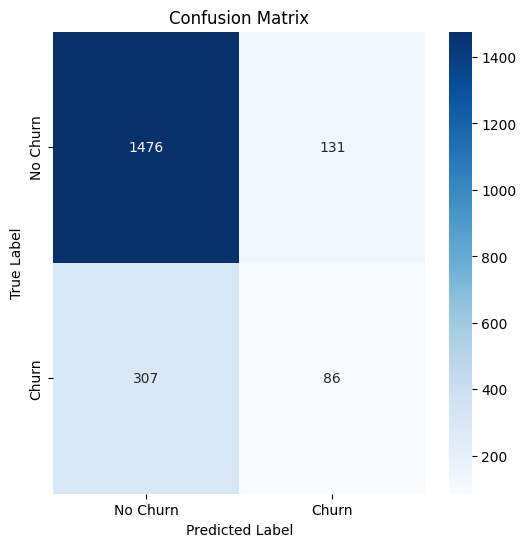

In [51]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()